# This notebook shows how to use the frequential class to analyse real data.

In [51]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from freq_cls import frequentiel_analysis

In [52]:
df_temp = pd.read_csv("/Users/noedaniel/Desktop/Freq_Molonari/MOLONARI1D/dataAnalysis/raw_data/point36_12_07_16/point36_temperature_cleaned.csv")
df_press = pd.read_csv("/Users/noedaniel/Desktop/Freq_Molonari/MOLONARI1D/dataAnalysis/raw_data/point36_12_07_16/point36_pression_cleaned.csv")

In [53]:
temp10 = df_temp["Temp_profondeur_10"]
temp20 = df_temp["Temp_profondeur_20"]
temp30 = df_temp["Temp_profondeur_30"]
temp_riv = df_press["temperature_stream"]
dates = df_press["dates"]

depths = [0, 0.1, 0.2, 0.3]

signals = np.array([temp_riv, temp10, temp20, temp30])

In [54]:
signals.shape

(4, 1630)

Quick plot for overview

Text(0, 0.5, 'Temperature °C')

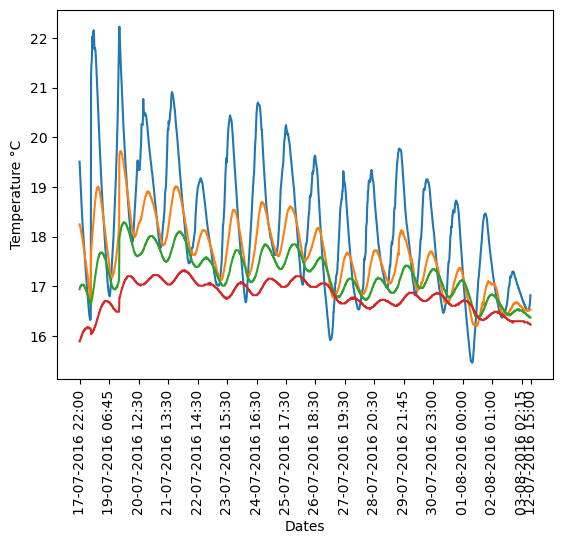

In [55]:
plt.figure(figsize=(6.4, 4.8))
cutoff = 100
for i in range(signals.shape[0]):
    plt.plot(dates[cutoff:], signals[i, cutoff:], label=f'Sensor at depth {depths[i]} m')

# Do not plot every date time
plt.xticks(dates[::100], rotation=90)
plt.xlabel("Dates")
plt.ylabel("Temperature °C")

In [56]:
import pandas as pd
import numpy as np

# colonne exemple : "12-07-2016 15:00"
# préciser le format accélère et évite les ambiguïtés
dates = pd.to_datetime(df_press['dates'],
                       format="%d-%m-%Y %H:%M",
                       dayfirst=True,
                       errors='coerce')

# diagnostics rapides
print("dtype:", dates.dtype)
print("NaT count:", dates.isna().sum())
print(dates.head())

# si certaines lignes sont NaT, on supprime les lignes invalides et on aligne les signaux
mask = dates.notna()
dates = dates[mask].reset_index(drop=True)

# # si vos signaux sont des Series (ou np.array rows = sensors), appliquez le même masque :
# signals = np.array([temp_riv, temp10, temp20, temp30])  # shape (n_sensors+1, n_times)
# signals = signals[:, mask.values]                       # garder les colonnes valides

# # appeler la recherche de périodes en passant explicitement dates (numpy datetime64 OK)
# dates_np = dates.to_numpy()   # dtype datetime64[ns]
# dominant_periods_days, dominant_freqs, dominant_amps = fa.find_dominant_periods(dates_np, signals, draw=True)

dtype: datetime64[ns]
NaT count: 0
0   2016-07-12 15:00:00
1   2016-07-12 15:15:00
2   2016-07-12 15:30:00
3   2016-07-12 15:45:00
4   2016-07-12 16:00:00
Name: dates, dtype: datetime64[ns]


# Convert date

Frequentiel analysis module initialized.
This module will analyze a multi-periodic signal to estimate attenuation and phase decay coefficients.
Using phase decay and amplitude attenuation with depth, we'll retrieve kappa_e and v_t for each dominant period.


/Users/noedaniel/Desktop/Freq_Molonari/MOLONARI1D/pyheatmy/freq_cls.py:158: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1.0 / (freqs * 86400.0), amp, label=f'Sensor at depth {depths[i]} m')


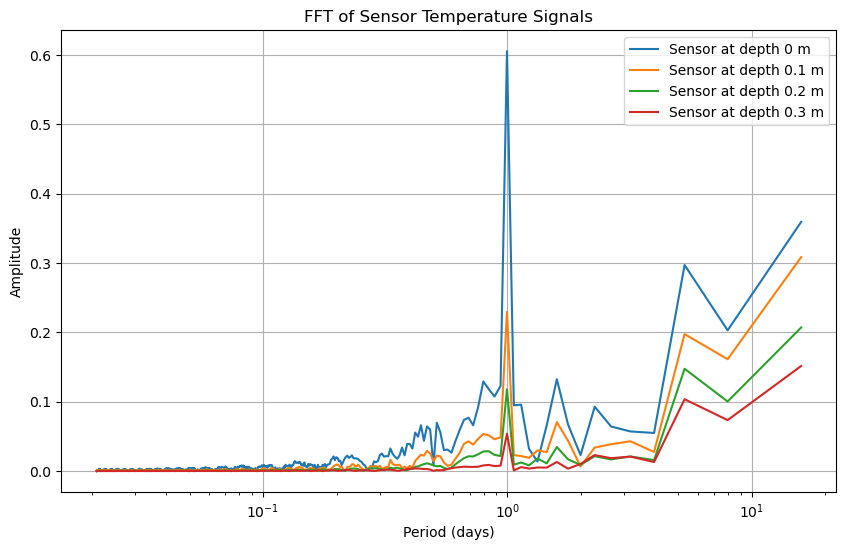

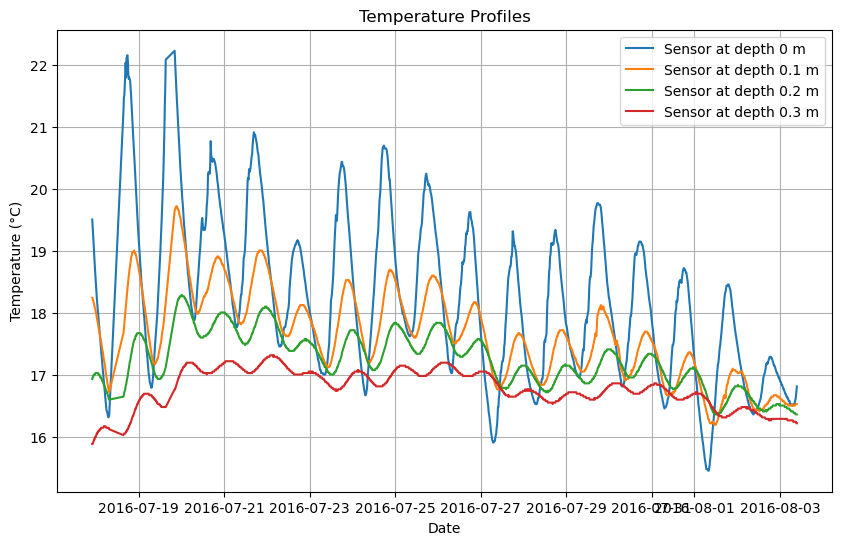

Dominant periods analysis complete
Found periods (days): [0.99609375 5.3125     1.59375    2.27678571 0.5141129  0.44270833]


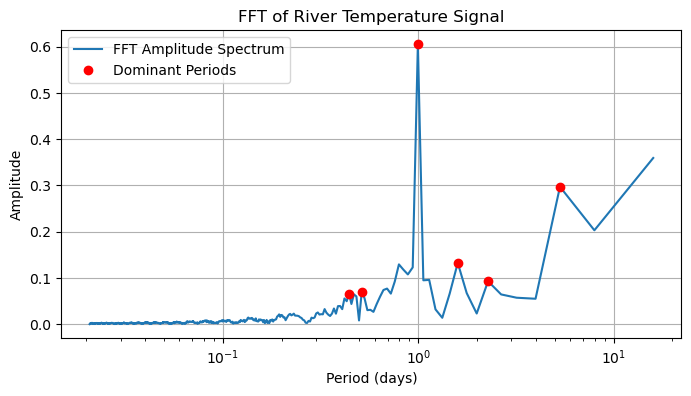

Detected depths: [0.  0.1 0.2 0.3]
Amplitudes at dominant periods for each signal computed.
Period 1.00 days: Amplitudes = [0.60556023 0.22968832 0.11803531 0.05393256]
Period 5.31 days: Amplitudes = [0.29714571 0.1976059  0.14759235 0.10366281]
Period 1.59 days: Amplitudes = [0.13252637 0.07064142 0.0347504  0.01317853]
Period 2.28 days: Amplitudes = [0.09289729 0.03397239 0.02159409 0.02317289]
Period 0.51 days: Amplitudes = [0.06966466 0.02247441 0.00692845 0.001443  ]
Period 0.44 days: Amplitudes = [0.06616912 0.02360509 0.00857551 0.00345802]


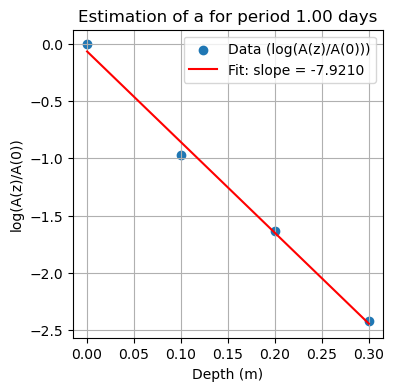

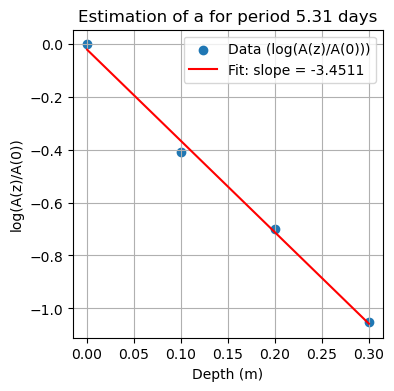

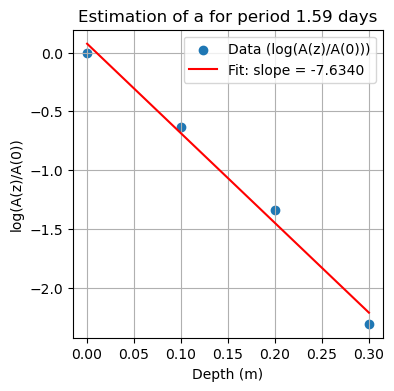

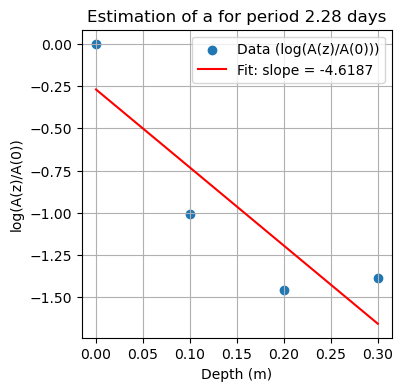

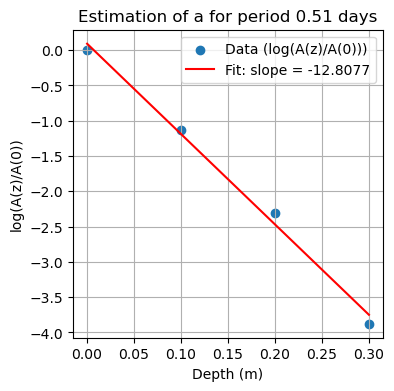

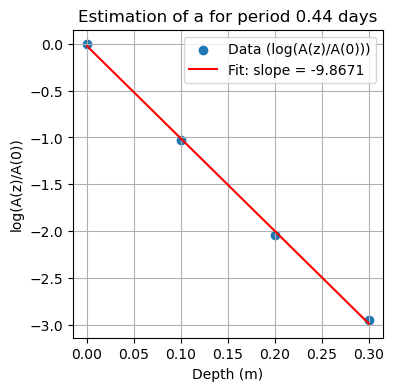

Attenuation coefficients a estimated for each dominant period.
Period 1.00 days: a = 7.9210 1/m
Period 1.00 days: R^2 = 0.9944
Period 5.31 days: a = 3.4511 1/m
Period 5.31 days: R^2 = 0.9961
Period 1.59 days: a = 7.6340 1/m
Period 1.59 days: R^2 = 0.9896
Period 2.28 days: a = 4.6187 1/m
Period 2.28 days: R^2 = 0.7864
Period 0.51 days: a = 12.8077 1/m
Period 0.51 days: R^2 = 0.9935
Period 0.44 days: a = 9.8671 1/m
Period 0.44 days: R^2 = 0.9992


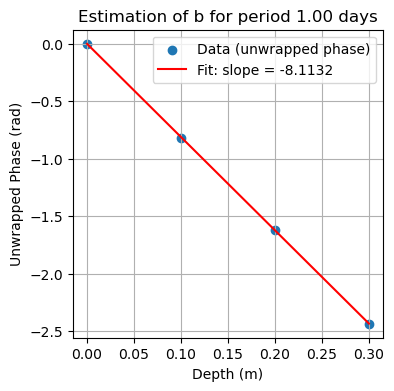

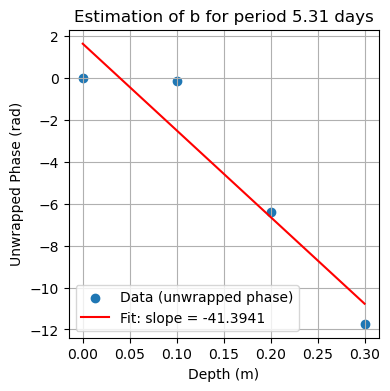

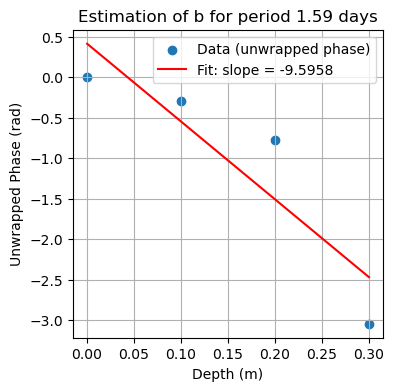

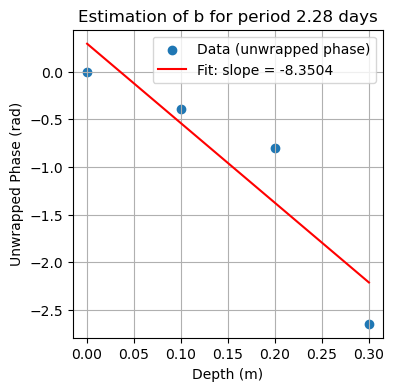

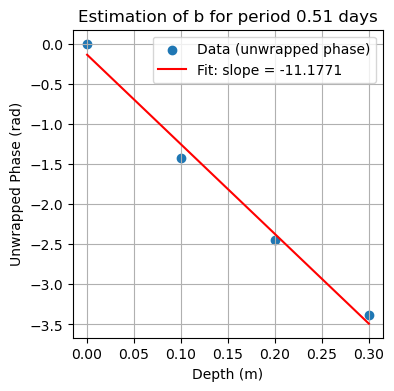

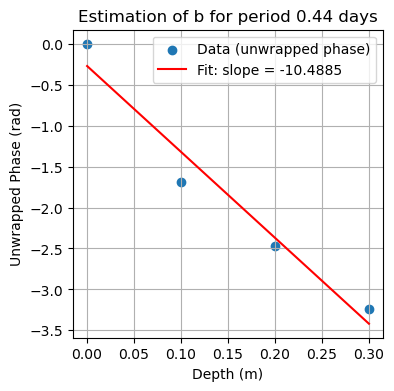

Phase decay coefficients b estimated for each dominant period.
Period 1.00 days: b = 8.1132 rad/m
Period 1.00 days: R^2 = 1.0000
Period 5.31 days: b = 41.3941 rad/m
Period 5.31 days: R^2 = 0.9033
Period 1.59 days: b = 9.5958 rad/m
Period 1.59 days: R^2 = 0.8064
Period 2.28 days: b = 8.3504 rad/m
Period 2.28 days: R^2 = 0.8481
Period 0.51 days: b = 11.1771 rad/m
Period 0.51 days: R^2 = 0.9899
Period 0.44 days: b = 10.4885 rad/m
Period 0.44 days: R^2 = 0.9570
Verification des constantes
[ 3.89042829e-01  4.93056198e+02  4.42772982e+00  1.04787698e+01
 -3.05348806e+00  1.28198373e+00]
Inversion complete.
Period 1.00 days: kappa_e = 5.544e-07 m^2/s, v_t = 2.157e-07 m/s
Period 5.31 days: kappa_e = 6.614e-10 m^2/s, v_t = 3.261e-07 m/s
Period 1.59 days: kappa_e = 2.414e-07 m^2/s, v_t = 1.069e-06 m/s
Period 2.28 days: kappa_e = 1.940e-07 m^2/s, v_t = 2.033e-06 m/s
Period 0.51 days: kappa_e = 5.609e-07 m^2/s, v_t = -1.713e-06 m/s
Period 0.44 days: kappa_e = 7.452e-07 m^2/s, v_t = 9.553e-07 m/s


In [57]:
fa = frequentiel_analysis()
depth_sensors = depths
river = signals[0, :]

signals = signals[:, cutoff:]
dates = dates[cutoff:]

# Plotting check figures
fa.fft_sensors(dates, signals, depth_sensors)
fa.plot_temperatures(dates, signals, depth_sensors)

# Finding dominant periods
dominant_periods_days, dominant_freqs, dominant_amps = fa.find_dominant_periods(signals, river, draw=True)

# Estimate a and b for these dominant periods
depths = np.array(depth_sensors)
a_est, a_R2 = fa.estimate_a(dates, signals, depths, dominant_periods_days, verbose=True, draw=True)
b_est, b_R2 = fa.estimate_b(dates, signals, depths, dominant_periods_days, verbose=True, draw=True)

# Checking constants
fa.check_constantes(a_est, b_est)

kappa_e, v_t = fa.perform_inversion(a_est, b_est, dominant_periods_days, verbose=True)